imported the necsessary packaages

In [6]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%pip install seaborn
import seaborn as sns


reading from the imported data sets

In [7]:
training=pd.read_csv("train.csv")
testing=pd.read_csv("test.csv")

basic functions to understand the data sets given

In [ ]:
training.head()

In [25]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 73.2+ KB


In [20]:
testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
training['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

1.understand the nature of the data using .info() and .describe()
2.histographs and boxplots to analyse the trends
3.values counts
4.missing data hepls decising wheter to remove or keep these
5.check corelation b/w metrices to look which things are related
6.explore intresting themes
7.featured engineering
8.processin the  data or tranform?


In [10]:
training["train_test"]=1
testing["train_test"]=0
testing["Survived"]=np.NaN
all_data=pd.concat([training,testing])
%matplotlib inline #can print column names of both data sets
all_data.columns



UsageError: unrecognized arguments: #can print column names of both data sets


In [12]:
training.describe().columns         #helps with bettee understanding of numeric value columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')

In [11]:
#for plotting num values and categorials separately
d_num=training[["Age","SibSp","Parch","Fare"]]
d_cate=training[["Survived","Pclass","Sex","Ticket","Cabin","Embarked"]]

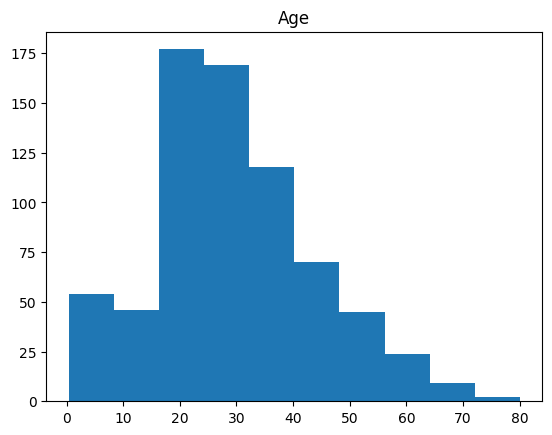

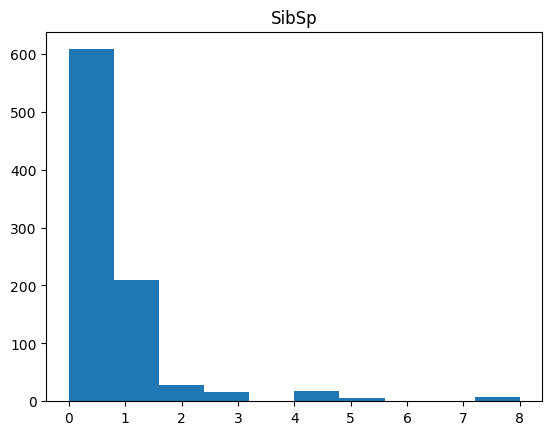

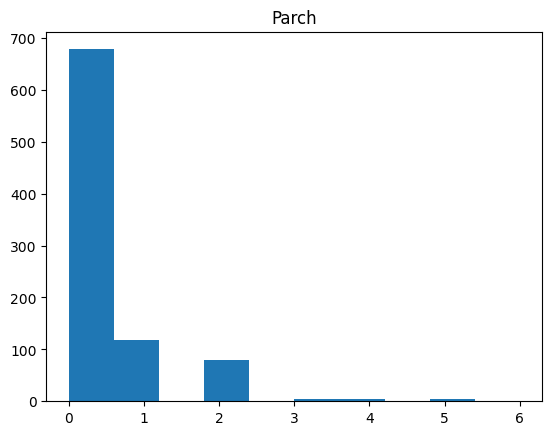

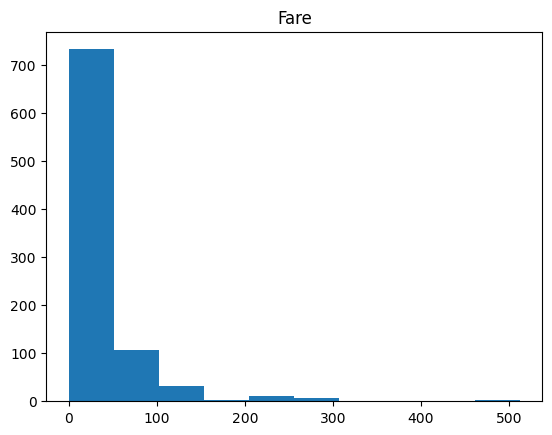

In [33]:
for i in d_num.columns:
    plt.hist(d_num[i])
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

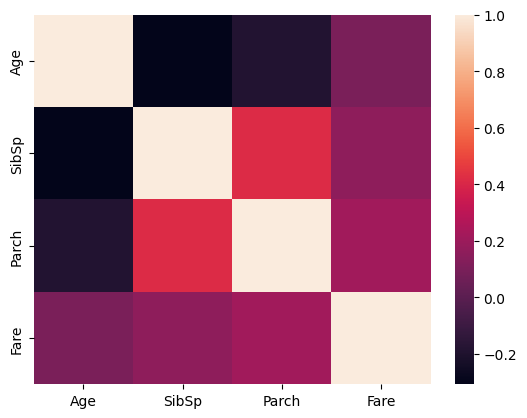

In [44]:
print(d_num.corr())
sns.heatmap(d_num.corr())

In [46]:
pd.pivot_table(training,index="Survived",values=["Age","SibSp","Parch","Fare"])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [15]:
for i in d_cate.columns:
    sns.barplot(d_cate[i].value_counts().index, d_cate[i].value_counts()).set_title(i)
    plt.show()

In [85]:
print(pd.pivot_table(training,index="Survived",columns="Pclass",values="Ticket",aggfunc="count"))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


In [86]:
print(pd.pivot_table(training,index="Survived",columns="Sex",values="Ticket",aggfunc="count"))

Sex       female  male
Survived              
0             81   468
1            233   109


In [88]:
print(pd.pivot_table(training,index="Survived",columns="Embarked",values="Ticket",aggfunc="count"))

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [20]:
d_cate.Cabin 
training["cabin_multiple"]=training.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(" ")))
training["cabin_multiple"].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [22]:
pd.pivot_table(training,index="Survived",columns="cabin_multiple",values="Ticket",aggfunc="count")

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [24]:
#creating categories bades on cabin letters
training["cabin_adv"]=training.Cabin.apply(lambda x: str(x)[0])

In [29]:
print(training.cabin_adv.value_counts())
pd.pivot_table(training,index="Survived",columns="cabin_adv",values="Name",aggfunc="count")

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [42]:
#understanding  ticket values (num/non num)
training["num_tick"]=training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
training["let_tick"]=training.Ticket.apply(lambda x: " ".join(x.split(" ")[ :-1]).replace(".","").replace("/","").lower() if len(x.split(" ")[:-1])>0 else 0)

In [43]:
pd.pivot_table(training,index="Survived",columns="num_tick",values="Ticket",aggfunc="count")

num_tick,0,1
Survived,,
0,142,407
1,88,254


In [64]:
pd.pivot_table(training,index="Survived",columns="let_tick",values="Ticket",aggfunc="count")

let_tick,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,sop,sopp,sotono2,sotonoq,sp,stono 2,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,1.0,3.0,2.0,13.0,1.0,7.0,3.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,2.0,NaN,5.0,3.0,2.0,1.0,1.0


In [65]:
training["name_title"]=training.Name.apply(lambda x: x.split(",")[1].split(".")[0].strip())

(891,)

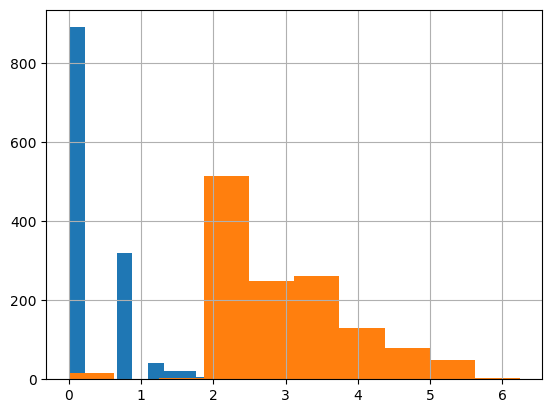

In [83]:
#data processing
all_data["cabin_multiple"]=all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(" ")))
all_data["cabin_adv"]=all_data.Cabin.apply(lambda x: str(x)[0])
all_data["num_tick"]=all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data["let_tick"]=all_data.Ticket.apply(lambda x: " ".join(x.split(" ")[ :-1]).replace("."," ").replace("/"," ").lower() if len(x.split(" ")[ :-1] )>0 else 0)
all_data["name_title"]=all_data.Name.apply(lambda x: x.split(",")[1].split(".")[0].strip())


#assinging null to continuous data
all_data.Age=all_data.Age.fillna(training.Age.mean())
all_data.Fare=all_data.Fare.fillna(training.Fare.mean())
#all_data.dropna(subset=["Embarked"].inplace=True)
all_data["norm_sibsp"]=np.log(all_data.SibSp+1)
all_data["norm_sibsp"].hist()
all_data["norm_fare"]=np.log(all_data.Fare+1)
all_data["norm_fare"].hist()
all_data.Pclass = all_data.Pclass.astype(str)
all_dummies=pd.get_dummies(all_data[["Pclass","Sex","Age","SibSp","Parch","norm_fare","Embarked","cabin_adv","cabin_multiple","num_tick","name_title","train_test"]])

x_train=all_dummies[all_dummies.train_test==1].drop(["train_test"],axis=1)
x_test=all_dummies[all_dummies.train_test==0].drop(["train_test"],axis=1)
y_train=all_data[all_data.train_test==1].Survived
y_train.shape


In [175]:
#scale data
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
all_dummies_scaled=all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']]=scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
all_dummies_scaled
x_train_scaled=all_dummies_scaled[all_dummies_scaled.train_test==1].drop(['train_test'],axis=1)
x_test_scaled=all_dummies_scaled[all_dummies_scaled.train_test==0].drop(['train_test'],axis=1)
y_train=all_data[all_data.train_test==1].Survived

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [141]:
gnb=GaussianNB()
cv=cross_val_score(gnb,x_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.67039106 0.70224719 0.75842697 0.74719101 0.73033708]
0.7217186617287051


In [134]:
#lr=LogisticRegression()
#param_grid={'max_iter':[2000],'penalty':['11','12'],
#'C':np.logspace(-4,4,20),'solver' : ['liblinear']}
#clf_lr=GridSearchCV(lr,param_grid=param_grid,cv=5,verbose=True,n_jobs= -1)
#best_clf_lr=clf_lr.fit(x_train,y_train)
#cif_performance(best_clf_lr,'Logistic Regression')


In [177]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.82122905 0.80898876 0.80337079 0.82022472 0.85393258]
0.8215491808423827


In [142]:

lr=LogisticRegression(max_iter=2000)
cv=cross_val_score(lr,x_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.82122905 0.80898876 0.80337079 0.82022472 0.85393258]
0.8215491808423827


In [90]:
dt=tree.DecisionTreeClassifier(random_state=1)
cv=cross_val_score(dt,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.74860335 0.74157303 0.80898876 0.75842697 0.8258427 ]
0.776686962525893


In [178]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,x_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.75418994 0.73595506 0.80898876 0.75280899 0.8258427 ]
0.7755570899504111


In [179]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.77094972 0.80898876 0.80898876 0.81460674 0.8258427 ]
0.8058753373925052


In [143]:
knn=KNeighborsClassifier()
cv=cross_val_score(knn,x_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.79888268 0.79213483 0.83146067 0.80337079 0.85393258]
0.815956311593748


In [93]:
rf=RandomForestClassifier(random_state=1)
cv=cross_val_score(rf,x_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.81564246 0.79775281 0.85393258 0.74157303 0.8258427 ]
0.8069487163392128


In [180]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.81564246 0.79775281 0.85393258 0.74157303 0.8258427 ]
0.8069487163392128


In [144]:
svc=SVC(probability=True)
cv=cross_val_score(svc,x_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.84916201 0.82022472 0.8258427  0.80337079 0.86516854]
0.8327537505492437


In [181]:
from xgboost import XGBClassifier
xgb=XGBClassifier(random_state=1)
cv=cross_val_score(xgb,x_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.82122905 0.82022472 0.86516854 0.79213483 0.82022472]
0.8237963718536185


In [184]:
from sklearn.ensemble import VotingClassifier
voting_clf=VotingClassifier(estimators=[("lr",lr),("gnb",gnb),("knn",knn),("rf",rf),("svc",svc),("xgb",xgb)],voting = 'soft')

In [185]:
cv=cross_val_score(voting_clf,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.82681564 0.82022472 0.8258427  0.8258427  0.85955056]
0.8316552633230808


In [187]:
voting_clf.fit(x_train_scaled,y_train)
y_hat_base_vc=voting_clf.predict(x_test)
basic_submission={"PassengerId":testing.PassengerId,"Survived": y_hat_base_vc}
base_submission=pd.DataFrame(data=basic_submission)
base_submission.to_csv("base_submission.csv",index=False)

In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [193]:
def clf_performance(classifier,model_name):
    print(model_name)
    print('Best score:'+str(classifier.best_score_))
    print('best parameter:'+str(classifier.best_params_))

In [194]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(x_train_scaled,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Best score:0.8271608813006089
best parameter:{'C': 1.623776739188721, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(x_train_scaled,y_train)
clf_performance(best_clf_svc,'SVC')

In [198]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(x_train_scaled,y_train)
clf_performance(best_clf_knn,'KNN')


Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN
Best score:0.8294017952419811
best parameter:{'algorithm': 'auto', 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}


In [ ]:
rf=RandomForestClassifier(random_state=1)
param_grid={'n_estimators':[400,450,500,550],
            'criterion':['gini','entropy'],
            'max_depth':[15,20,25],
            'max_features':['auto','sqrrt',10],
            'min_samples_leaf':[2,3],
           'min_samples_split':[2,3]}
clf_rf=GridSearchCV(rf,param_grid=param_grid,cv=5,verbose=True,n_jobs= -1)
best_clf_rf=clf_rf.fit(x_train_scaled,y_train)
clf_performance(best_rf,'Random Forest')

<AxesSubplot:>

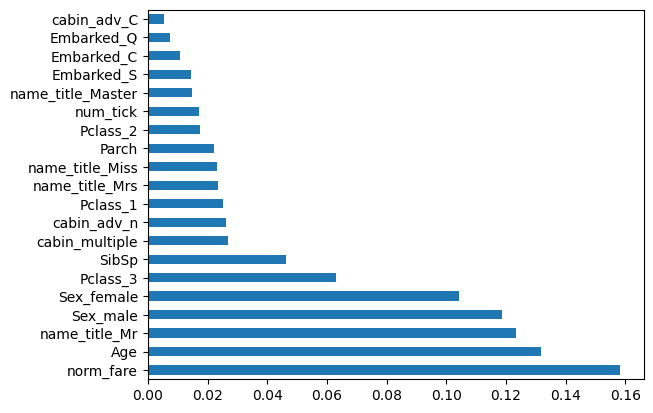

In [154]:
best_rf=best_clf_rf.best_estimator_.fit(x_train_scaled,y_train)
feat_importances=pd.Series(best_rf.feature_importances_,index=x_train_scaled.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [ ]:
xgb = XGBClassifier(random_state = 1)
param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}
clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(x_train_scaled,y_train)
clf_performance(best_clf_xgb,'XGB')

In [ ]:
y_hat_xgb=best_clf_xgb.best_estimator_.predict(x_test_scaled)
xgb_submission={'PassengerId':testing.PassengerId,'Survived':y_hat_xgb}
submission_xgb=pd.DataFrame(data=xgb_submission)
submission_xgb.to_csv('xgb_submission3.csv',index=False)

In [ ]:
best_lr=best_clf_lr.best_estimator_
best_knn=best_clf_knn.best_estimator_
best_svc=best_clf_svc.best_estimator_
best_rf=best_clf_rf.best_estimator_
best_xgb=best_clf_xgb.best_estimator_
voting_clf_hard=VotingClassifier(estimators=[('knn',best_knn),('rf',best_rf),('svc',best_svc)],voting='hard')
voting_clf_soft=VotingClassifier(estimators=[('knn',best_knn),('rf',best_rf),('svc',best_svc)],voting='soft')
voting_clf_all=VotingClassifier(estimators=[('knn',best_knn),('rf',best_rf),('svc',best_svc),('lr',best_lr)],voting='soft')
voting_clf_xgb=VotingClassifier(estimators=[('knn',best_knn),('rf',best_rf),('svc',best_svc),('xgb',best_xgb),('lr',best_lr)],voting='soft')

print('voting_clf_hard:',cross_val_score(voting_clf_hard,x_train,y_tain,cv=5))
print('voting_clf_hard mean:',cross_val_score(voting_clf_hard,x_train,y_train,cv=5).mean())
print('voting_clf_soft:',cross_val_score(voting_clf_soft,x_train,y_train,cv=5))
print('voting_clf_soft mean:',cross_val_score(voting_clf_soft,x_train,y_train,cv=5).mean())
print('voting_clf_all:',cross_val_score(voting_clf_all,x_train,y_train,cv=5))
print('voting_clf_all mean :',cross_val_score(voting_clf_all,x_train,y_train,cv=5).mean())
print('voting_clf_xgb:',cross_val_score(voting_clf_xgb,x_train,y_train,cv=5))
print('voting_clf_xgb mean:',cross_val_score(voting_clf_xgb,x_train,y_train,cv=5).mean())


In [ ]:
params={'weights' :[[1,1,1],[1,2,1],[1,1,2],[2,1,1],[2,2,1],[1,2,2],[2,1,2]]}
vote_weight=GridSearchCV(voting_clf_soft,paran_grid=params,cv=5,verbose=True,n_jobs =-1)
best_clf_weight=vote_weight.fit(x_train_sacled,y_train)
clf_performance(best_clf_weight,'VC Weights')
voting_clf_sub=best_clf_weight.best_estimator_.predict(x_test_scaled)

In [ ]:
voting_clf_hard.fit(x_train_scaled, y_train)
voting_clf_soft.fit(x_train_scaled, y_train)
voting_clf_all.fit(x_train_scaled, y_train)
voting_clf_xgb.fit(x_train_scaled, y_train)

best_rf.fit(x_train_scaled, y_train)
y_hat_vc_hard = voting_clf_hard.predict(x_test_scaled).astype(int)
y_hat_rf = best_rf.predict(x_test_scaled).astype(int)
y_hat_vc_soft =  voting_clf_soft.predict(x_test_scaled).astype(int)
y_hat_vc_all = voting_clf_all.predict(x_test_scaled).astype(int)
y_hat_vc_xgb = voting_clf_xgb.predict(x_test_scaled).astype(int)

In [ ]:
final_data = {'PassengerId': test.PassengerId, 'Survived': y_hat_rf}
submission = pd.DataFrame(data=final_data)
final_data_2 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_hard}
submission_2 = pd.DataFrame(data=final_data_2)
final_data_3 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_soft}
submission_3 = pd.DataFrame(data=final_data_3)
final_data_4 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_all}
submission_4 = pd.DataFrame(data=final_data_4)
final_data_5 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_xgb}
submission_5 = pd.DataFrame(data=final_data_5)
final_data_comp = {'PassengerId': test.PassengerId, 'Survived_vc_hard': y_hat_vc_hard,'Survived_rf': y_hat_rf,'Survived_vc_soft':y_hat_vc_soft,'Survived_vc_all' : y_hat_vc_all,  'Survived_vc_xgb' : y_hat_vc_xgb}
comparison = pd.DataFrame(data=final_data_comp)


In [ ]:
#uses to track differences between outputs 
comparison['difference_rf_vc_hard'] = comparison.apply(lambda x: 1 if x.Survived_vc_hard != x.Survived_rf else 0, axis =1)
comparison['difference_soft_hard'] = comparison.apply(lambda x: 1 if x.Survived_vc_hard != x.Survived_vc_soft else 0, axis =1)
comparison['difference_hard_all'] = comparison.apply(lambda x: 1 if x.Survived_vc_all != x.Survived_vc_hard else 0, axis =1)

In [ ]:
comparison.difference_hard_all.value_counts()
submission.to_csv('submission_rf.csv', index =False)
submission_2.to_csv('submission_vc_hard.csv',index=False)
submission_3.to_csv('submission_vc_soft.csv', index=False)
submission_4.to_csv('submission_vc_all.csv', index=False)
submission_5.to_csv('submission_vc_xgb2.csv', index=False)